You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [116]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
url = 'https://raw.githubusercontent.com/yveness7/IronHackIvet/main/Week%207/day%202/DATA_Customer-Churn.csv'
churnData = pd.read_csv(url)
churnData = churnData.dropna()
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [117]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [121]:
#we have a value " " so we need to replace it 

churnData['TotalCharges'] = churnData['TotalCharges'].replace({" ":"0"})
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'])

In [122]:
churnData.dtypes #conversion successful 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [123]:
#check null values
churnData.isnull().values.any() #no null 

False

In [124]:
churnData.isnull().sum().sum()

0

In [141]:
churnData.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [142]:
churnData.rename(columns=lambda x: x.lower(), inplace=True)
churnData.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [143]:
check_for_nan = churnData['totalcharges'].isnull()
print (check_for_nan)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: totalcharges, Length: 7043, dtype: bool


In [149]:
#totalcharges
churnData['totalcharges'].isnull().values.any()

False

## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges: 

In [150]:
#define X and y

In [151]:
X = df[['tenure','seniorcitizen','monthlycharges',
        'totalcharges']] 
y = df[['churn']]

In [152]:
X

,tenure,seniorcitizen,monthlycharges,totalcharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.5
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.5
7039,72,0,103.20,7362.9
7040,11,0,29.60,346.45
7041,4,1,74.40,306.6


In [153]:
y['churn'] = y['churn'].map({'Yes': 1, 'No': 0}) #change Yes/No to 1/0

/tmp/ipykernel_40364/848572732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['churn'] = y['churn'].map({'Yes': 1, 'No': 0}) #change Yes/No to 1/0


In [154]:
y

,churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [155]:
#Split the data into a training set and a test set.

In [156]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [157]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) 

In [158]:
X_train

,tenure,seniorcitizen,monthlycharges,totalcharges
6924,1,0,69.35,69.35
5249,72,0,67.20,4671.7
5852,21,1,69.10,1474.75
3597,25,0,95.70,2338.35
4147,71,1,24.85,1901
...,...,...,...,...
5218,0,0,19.70,
4060,54,0,63.35,3409.1
1346,14,0,87.25,1258.6
3454,29,1,35.65,1025.15


In [162]:
check_for_nan = churnData['totalcharges'].isnull().values.any()
print (check_for_nan)

False


In [163]:
churnData['totalcharges'] = churnData['totalcharges'].replace({" ":"0"})

In [166]:
X_train['totalcharges'] = X_train['totalcharges'].replace({" ":"0"})
X_train

,tenure,seniorcitizen,monthlycharges,totalcharges
6924,1,0,69.35,69.35
5249,72,0,67.20,4671.7
5852,21,1,69.10,1474.75
3597,25,0,95.70,2338.35
4147,71,1,24.85,1901
...,...,...,...,...
5218,0,0,19.70,0
4060,54,0,63.35,3409.1
1346,14,0,87.25,1258.6
3454,29,1,35.65,1025.15


In [169]:
X_test['totalcharges'] = X_test['totalcharges'].replace({" ":"0"})

## Scale the features either by using normalizer or a standard scaler.

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
scaler = StandardScaler()

#fit and scale

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## modelling

### (optional)Fit a logistic Regression model on the training data

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



log_model = LogisticRegression() 

## Data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

pt = PowerTransformer()
pt.fit(X_train_scaled)
X_train_log = pt.transform(X_train_scaled)
X_test_log = pt.transform(X_test_scaled)

#where the magic happens

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


/home/yv/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.794462,0.779986
1,Precision,0.659617,0.660305
2,Recall,0.444068,0.439086


In [208]:
transformed_sample = pt.transform(X_test.sample()) #i powertradnform each value
log_model.predict_proba(transformed_sample) #we predict with the sample we transformed 
#proba will predict the values that we get 

#the probability No is class=0, first value 
# second is being class = 1 

/home/yv/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PowerTransformer was fitted without feature names
  warnings.warn(


array([[0., 1.]])

## confusion matrix 

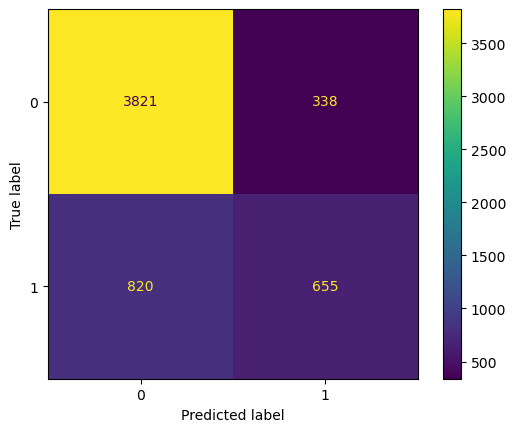

In [199]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

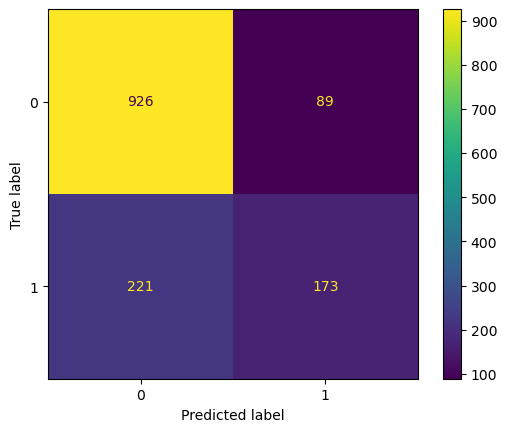

In [200]:
cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp_test = ConfusionMatrixDisplay(cm_test)
disp_test.plot()

### Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [225]:
model = KNeighborsClassifier(n_neighbors=50,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})


display(performance_log)

/home/yv/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Error_metric,Train,Test
0,Accuracy,0.80,0.78
1,Precision,0.68,0.68
2,Recall,0.45,0.43


In [202]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [203]:
#Confusion matrices

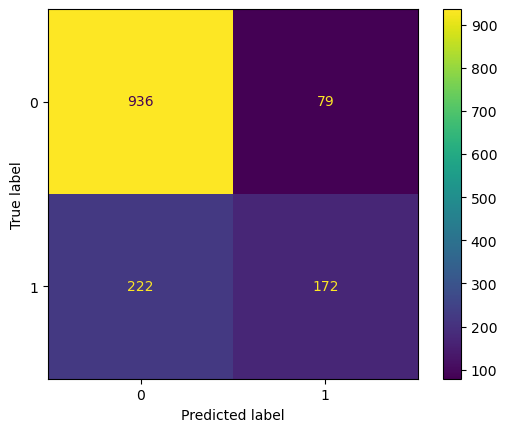

In [204]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [209]:
#performance metrics